In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked deck
0         0       3    male  22.0      1      0   7.2500        S  NaN
1         1       1  female  38.0      1      0  71.2833        C    C
2         1       3  female  26.0      0      0   7.9250        S  NaN
3         1       1  female  35.0      1      0  53.1000        S    C
4         0       3    male  35.0      0      0   8.0500        S  NaN

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [4]:
titanic.age.fillna(titanic.age.mean(), inplace=True)

In [5]:
titanic.age.isnull().sum()

0

In [6]:
print(titanic.groupby(by='sibsp').sum()["survived"])

print(titanic.groupby(by='parch').count()["survived"])


sibsp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: survived, dtype: int64
parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: survived, dtype: int64


In [7]:
titanic.sibsp + titanic.parch

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [8]:
titanic.sibsp.add(titanic.parch)

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Length: 891, dtype: int64

In [9]:
titanic["total_rel"] = titanic.sibsp.add(titanic.parch)

In [10]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked deck  \
0         0       3    male  22.0      1      0   7.2500        S  NaN   
1         1       1  female  38.0      1      0  71.2833        C    C   
2         1       3  female  26.0      0      0   7.9250        S  NaN   
3         1       1  female  35.0      1      0  53.1000        S    C   
4         0       3    male  35.0      0      0   8.0500        S  NaN   

   total_rel  
0          1  
1          1  
2          0  
3          1  
4          0

In [11]:
sales = pd.read_csv("sales.csv", index_col = 0)

In [12]:
sales.head()

Mon  Tue  Wed   Thu  Fri
Steven   34   27   15   NaN   33
Mike     45    9   74  87.0   12
Andi     17   33   54   8.0   29
Paul     87   67   27  45.0    7

In [13]:
sales.Mon + sales.Thu

Steven      NaN
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [14]:
sales.Mon.add(sales.Thu, fill_value=0 )

Steven     34.0
Mike      132.0
Andi       25.0
Paul      132.0
dtype: float64

In [15]:
sales["Bonus"] = [0.12, 0.15, 0.10, 0.20]

In [16]:
sales.head()

Mon  Tue  Wed   Thu  Fri  Bonus
Steven   34   27   15   NaN   33   0.12
Mike     45    9   74  87.0   12   0.15
Andi     17   33   54   8.0   29   0.10
Paul     87   67   27  45.0    7   0.20

In [17]:
sales.Thu * sales.Bonus

Steven      NaN
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [18]:
sales.Thu.mul(sales.Bonus, fill_value=0)

Steven     0.00
Mike      13.05
Andi       0.80
Paul       9.00
dtype: float64

In [19]:
sales["Total_Bonus"] = sales.iloc[ :, :-1].sum(axis=1).mul(sales.Bonus)

In [20]:
sales.head()

Mon  Tue  Wed   Thu  Fri  Bonus  Total_Bonus
Steven   34   27   15   NaN   33   0.12        13.08
Mike     45    9   74  87.0   12   0.15        34.05
Andi     17   33   54   8.0   29   0.10        14.10
Paul     87   67   27  45.0    7   0.20        46.60

In [21]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked deck  \
0         0       3    male  22.0      1      0   7.2500        S  NaN   
1         1       1  female  38.0      1      0  71.2833        C    C   
2         1       3  female  26.0      0      0   7.9250        S  NaN   
3         1       1  female  35.0      1      0  53.1000        S    C   
4         0       3    male  35.0      0      0   8.0500        S  NaN   

   total_rel  
0          1  
1          1  
2          0  
3          1  
4          0

In [22]:
titanic["YoB"] = titanic.age.sub(1912).mul(-1)

In [23]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked deck  \
0         0       3    male  22.0      1      0   7.2500        S  NaN   
1         1       1  female  38.0      1      0  71.2833        C    C   
2         1       3  female  26.0      0      0   7.9250        S  NaN   
3         1       1  female  35.0      1      0  53.1000        S    C   
4         0       3    male  35.0      0      0   8.0500        S  NaN   

   total_rel     YoB  
0          1  1890.0  
1          1  1874.0  
2          0  1886.0  
3          1  1877.0  
4          0  1877.0

In [24]:
fx_rate = 1.1

In [25]:
titanic["EUR_rate"] = titanic.fare.div(fx_rate)

In [26]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked deck  \
0         0       3    male  22.0      1      0   7.2500        S  NaN   
1         1       1  female  38.0      1      0  71.2833        C    C   
2         1       3  female  26.0      0      0   7.9250        S  NaN   
3         1       1  female  35.0      1      0  53.1000        S    C   
4         0       3    male  35.0      0      0   8.0500        S  NaN   

   total_rel     YoB   EUR_rate  
0          1  1890.0   6.590909  
1          1  1874.0  64.803000  
2          0  1886.0   7.204545  
3          1  1877.0  48.272727  
4          0  1877.0   7.318182

## Mapping

In [27]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked deck  \
0         0       3    male  22.0      1      0   7.2500        S  NaN   
1         1       1  female  38.0      1      0  71.2833        C    C   
2         1       3  female  26.0      0      0   7.9250        S  NaN   
3         1       1  female  35.0      1      0  53.1000        S    C   
4         0       3    male  35.0      0      0   8.0500        S  NaN   

   total_rel     YoB   EUR_rate  
0          1  1890.0   6.590909  
1          1  1874.0  64.803000  
2          0  1886.0   7.204545  
3          1  1877.0  48.272727  
4          0  1877.0   7.318182

In [28]:
embarked_dict = {"S":1, "C":2, "Q":3 }

In [29]:
titanic.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [30]:
titanic.embarked = titanic.embarked.map(embarked_dict)

In [31]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare  embarked deck  \
0         0       3    male  22.0      1      0   7.2500       1.0  NaN   
1         1       1  female  38.0      1      0  71.2833       2.0    C   
2         1       3  female  26.0      0      0   7.9250       1.0  NaN   
3         1       1  female  35.0      1      0  53.1000       1.0    C   
4         0       3    male  35.0      0      0   8.0500       1.0  NaN   

   total_rel     YoB   EUR_rate  
0          1  1890.0   6.590909  
1          1  1874.0  64.803000  
2          0  1886.0   7.204545  
3          1  1877.0  48.272727  
4          0  1877.0   7.318182

## Conditional transformation

In [32]:
titanic["alone"] = pd.Series(np.where(titanic.total_rel==0, "Yes", "No"))

In [33]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare  embarked deck  \
0         0       3    male  22.0      1      0   7.2500       1.0  NaN   
1         1       1  female  38.0      1      0  71.2833       2.0    C   
2         1       3  female  26.0      0      0   7.9250       1.0  NaN   
3         1       1  female  35.0      1      0  53.1000       1.0    C   
4         0       3    male  35.0      0      0   8.0500       1.0  NaN   

   total_rel     YoB   EUR_rate alone  
0          1  1890.0   6.590909    No  
1          1  1874.0  64.803000    No  
2          0  1886.0   7.204545   Yes  
3          1  1877.0  48.272727    No  
4          0  1877.0   7.318182   Yes

In [34]:
titanic["child"] = pd.Series((np.where(titanic.age<18, "Yes", "No")))

In [35]:
titanic.head(10)

survived  pclass     sex        age  sibsp  parch     fare  embarked deck  \
0         0       3    male  22.000000      1      0   7.2500       1.0  NaN   
1         1       1  female  38.000000      1      0  71.2833       2.0    C   
2         1       3  female  26.000000      0      0   7.9250       1.0  NaN   
3         1       1  female  35.000000      1      0  53.1000       1.0    C   
4         0       3    male  35.000000      0      0   8.0500       1.0  NaN   
5         0       3    male  29.699118      0      0   8.4583       3.0  NaN   
6         0       1    male  54.000000      0      0  51.8625       1.0    E   
7         0       3    male   2.000000      3      1  21.0750       1.0  NaN   
8         1       3  female  27.000000      0      2  11.1333       1.0  NaN   
9         1       2  female  14.000000      1      0  30.0708       2.0  NaN   

   total_rel          YoB   EUR_rate alone child  
0          1  1890.000000   6.590909    No    No  
1          1  1874.000000  64.803000    No    No  
2          0  1886.000000   7.204545   Yes    No  
3          1  1877.000000  48.272727    No    No  
4          0  1877.000000   7.318182   Yes    No  
5          0  1882.300882   7.689364   Yes    No  
6          0  1858.000000  47.147727   Yes    No  
7          4  1910.000000  19.159091    No   Yes  
8          2  1885.000000  10.121182    No    No  
9          1  1898.000000  27.337091    No   Yes

## Binning

In [36]:
age_bins = [0, 10, 18, 30, 55, 100]

In [37]:
pd.cut(titanic.age, age_bins, right= False)

0      [18, 30)
1      [30, 55)
2      [18, 30)
3      [30, 55)
4      [30, 55)
         ...   
886    [18, 30)
887    [18, 30)
888    [18, 30)
889    [18, 30)
890    [30, 55)
Name: age, Length: 891, dtype: category
Categories (5, interval[int64]): [[0, 10) < [10, 18) < [18, 30) < [30, 55) < [55, 100)]

In [38]:
titanic["age_cat"] = pd.cut(titanic.age, age_bins, right= False)

In [39]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare  embarked deck  \
0         0       3    male  22.0      1      0   7.2500       1.0  NaN   
1         1       1  female  38.0      1      0  71.2833       2.0    C   
2         1       3  female  26.0      0      0   7.9250       1.0  NaN   
3         1       1  female  35.0      1      0  53.1000       1.0    C   
4         0       3    male  35.0      0      0   8.0500       1.0  NaN   

   total_rel     YoB   EUR_rate alone child   age_cat  
0          1  1890.0   6.590909    No    No  [18, 30)  
1          1  1874.0  64.803000    No    No  [30, 55)  
2          0  1886.0   7.204545   Yes    No  [18, 30)  
3          1  1877.0  48.272727    No    No  [30, 55)  
4          0  1877.0   7.318182   Yes    No  [30, 55)

In [40]:
titanic.age_cat.value_counts()

[18, 30)     448
[30, 55)     288
[0, 10)       62
[10, 18)      51
[55, 100)     42
Name: age_cat, dtype: int64

In [41]:
titanic.groupby("age_cat").survived.mean()

age_cat
[0, 10)      0.612903
[10, 18)     0.450980
[18, 30)     0.328125
[30, 55)     0.420139
[55, 100)    0.309524
Name: survived, dtype: float64

In [42]:
age_groups = ["child", "teenager", "young_adult", "adult", "elderly"]

In [43]:
titanic["age_cat"] = pd.cut(titanic.age, age_bins, labels=age_groups )

In [44]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare  embarked deck  \
0         0       3    male  22.0      1      0   7.2500       1.0  NaN   
1         1       1  female  38.0      1      0  71.2833       2.0    C   
2         1       3  female  26.0      0      0   7.9250       1.0  NaN   
3         1       1  female  35.0      1      0  53.1000       1.0    C   
4         0       3    male  35.0      0      0   8.0500       1.0  NaN   

   total_rel     YoB   EUR_rate alone child      age_cat  
0          1  1890.0   6.590909    No    No  young_adult  
1          1  1874.0  64.803000    No    No        adult  
2          0  1886.0   7.204545   Yes    No  young_adult  
3          1  1877.0  48.272727    No    No        adult  
4          0  1877.0   7.318182   Yes    No        adult

In [45]:
pd.qcut(titanic.fare,5)

0        (-0.001, 7.854]
1      (39.688, 512.329]
2          (7.854, 10.5]
3      (39.688, 512.329]
4          (7.854, 10.5]
             ...        
886       (10.5, 21.679]
887     (21.679, 39.688]
888     (21.679, 39.688]
889     (21.679, 39.688]
890      (-0.001, 7.854]
Name: fare, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [46]:
pd.qcut(titanic.fare,5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: fare, dtype: int64

In [47]:
pd.qcut(titanic.fare,[0,0.1,0.25,0.5,0.9,1]).value_counts()

(14.454, 77.958]     357
(7.91, 14.454]       224
(7.55, 7.91]         131
(-0.001, 7.55]        92
(77.958, 512.329]     87
Name: fare, dtype: int64

In [48]:
fare_labels = ["very_cheap", "cheap", "moderate", "exp", "very_exp"]

In [49]:
titanic["fare_cat"] = pd.qcut(titanic.fare,[0,0.1,0.25,0.5,0.9,1], labels = fare_labels)

In [50]:
titanic["fare_cat"].value_counts()

exp           357
moderate      224
cheap         131
very_cheap     92
very_exp       87
Name: fare_cat, dtype: int64

In [51]:
titanic.groupby(["age_cat", "fare_cat"]).survived.mean().unstack()

fare_cat     very_cheap     cheap  moderate       exp  very_exp
age_cat                                                        
child               NaN       NaN  0.875000  0.547170  0.666667
teenager       0.333333  0.222222  0.480000  0.272727  0.900000
young_adult    0.163934  0.280000  0.224138  0.457746  0.678571
adult          0.000000  0.052632  0.313433  0.491667  0.794872
elderly        0.000000  0.000000  0.250000  0.250000  0.714286

## Caps and floors

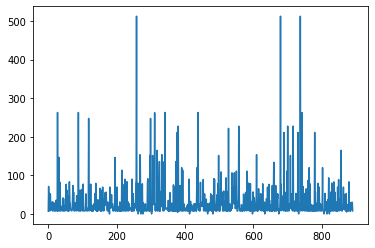

In [52]:
titanic.fare.plot()

In [53]:
titanic.fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

In [54]:
titanic.fare.sort_values(ascending=False)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
         ...   
277      0.0000
633      0.0000
302      0.0000
597      0.0000
271      0.0000
Name: fare, Length: 891, dtype: float64

In [55]:
fare_cap = 263

In [60]:
titanic.loc[titanic.fare>fare_cap, "fare"] = fare_cap

In [62]:
titanic.fare.sort_values(ascending=False)

341    263.0
438    263.0
88     263.0
679    263.0
258    263.0
       ...  
277      0.0
633      0.0
302      0.0
597      0.0
271      0.0
Name: fare, Length: 891, dtype: float64

In [69]:
titanic.fare.sort_values().head(20)

271    0.0000
597    0.0000
302    0.0000
633    0.0000
277    0.0000
413    0.0000
674    0.0000
263    0.0000
466    0.0000
732    0.0000
179    0.0000
806    0.0000
481    0.0000
822    0.0000
815    0.0000
378    4.0125
872    5.0000
326    6.2375
843    6.4375
818    6.4500
Name: fare, dtype: float64

In [70]:
fare_min_cap = 5

In [74]:
titanic.loc[titanic.fare<5, "fare"] = fare_min_cap = 5

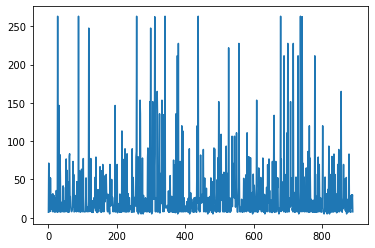

In [76]:
titanic.fare.plot()
plt.show()

## Dummy variables / 1 hot encoding

In [78]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare  embarked deck  \
0         0       3    male  22.0      1      0   7.2500       1.0  NaN   
1         1       1  female  38.0      1      0  71.2833       2.0    C   
2         1       3  female  26.0      0      0   7.9250       1.0  NaN   
3         1       1  female  35.0      1      0  53.1000       1.0    C   
4         0       3    male  35.0      0      0   8.0500       1.0  NaN   

   total_rel     YoB   EUR_rate alone child      age_cat    fare_cat  
0          1  1890.0   6.590909    No    No  young_adult  very_cheap  
1          1  1874.0  64.803000    No    No        adult         exp  
2          0  1886.0   7.204545   Yes    No  young_adult    moderate  
3          1  1877.0  48.272727    No    No        adult         exp  
4          0  1877.0   7.318182   Yes    No        adult    moderate

In [79]:
pd.get_dummies(titanic, columns = ["sex"])

survived  pclass        age  sibsp  parch     fare  embarked deck  \
0           0       3  22.000000      1      0   7.2500       1.0  NaN   
1           1       1  38.000000      1      0  71.2833       2.0    C   
2           1       3  26.000000      0      0   7.9250       1.0  NaN   
3           1       1  35.000000      1      0  53.1000       1.0    C   
4           0       3  35.000000      0      0   8.0500       1.0  NaN   
..        ...     ...        ...    ...    ...      ...       ...  ...   
886         0       2  27.000000      0      0  13.0000       1.0  NaN   
887         1       1  19.000000      0      0  30.0000       1.0    B   
888         0       3  29.699118      1      2  23.4500       1.0  NaN   
889         1       1  26.000000      0      0  30.0000       2.0    C   
890         0       3  32.000000      0      0   7.7500       3.0  NaN   

     total_rel          YoB   EUR_rate alone child      age_cat    fare_cat  \
0            1  1890.000000   6.590909    No    No  young_adult  very_cheap   
1            1  1874.000000  64.803000    No    No        adult         exp   
2            0  1886.000000   7.204545   Yes    No  young_adult    moderate   
3            1  1877.000000  48.272727    No    No        adult         exp   
4            0  1877.000000   7.318182   Yes    No        adult    moderate   
..         ...          ...        ...   ...   ...          ...         ...   
886          0  1885.000000  11.818182   Yes    No  young_adult    moderate   
887          0  1893.000000  27.272727   Yes    No  young_adult         exp   
888          3  1882.300882  21.318182    No    No  young_adult         exp   
889          0  1886.000000  27.272727   Yes    No  young_adult         exp   
890          0  1880.000000   7.045455   Yes    No        adult       cheap   

     sex_female  sex_male  
0             0         1  
1             1         0  
2             1         0  
3             1         0  
4             0         1  
..          ...       ...  
886           0         1  
887           1         0  
888           1         0  
889           0         1  
890           0         1  

[891 rows x 17 columns]

In [80]:
pd.get_dummies(titanic, columns = ["sex"], drop_first=True)

survived  pclass        age  sibsp  parch     fare  embarked deck  \
0           0       3  22.000000      1      0   7.2500       1.0  NaN   
1           1       1  38.000000      1      0  71.2833       2.0    C   
2           1       3  26.000000      0      0   7.9250       1.0  NaN   
3           1       1  35.000000      1      0  53.1000       1.0    C   
4           0       3  35.000000      0      0   8.0500       1.0  NaN   
..        ...     ...        ...    ...    ...      ...       ...  ...   
886         0       2  27.000000      0      0  13.0000       1.0  NaN   
887         1       1  19.000000      0      0  30.0000       1.0    B   
888         0       3  29.699118      1      2  23.4500       1.0  NaN   
889         1       1  26.000000      0      0  30.0000       2.0    C   
890         0       3  32.000000      0      0   7.7500       3.0  NaN   

     total_rel          YoB   EUR_rate alone child      age_cat    fare_cat  \
0            1  1890.000000   6.590909    No    No  young_adult  very_cheap   
1            1  1874.000000  64.803000    No    No        adult         exp   
2            0  1886.000000   7.204545   Yes    No  young_adult    moderate   
3            1  1877.000000  48.272727    No    No        adult         exp   
4            0  1877.000000   7.318182   Yes    No        adult    moderate   
..         ...          ...        ...   ...   ...          ...         ...   
886          0  1885.000000  11.818182   Yes    No  young_adult    moderate   
887          0  1893.000000  27.272727   Yes    No  young_adult         exp   
888          3  1882.300882  21.318182    No    No  young_adult         exp   
889          0  1886.000000  27.272727   Yes    No  young_adult         exp   
890          0  1880.000000   7.045455   Yes    No        adult       cheap   

     sex_male  
0           1  
1           0  
2           0  
3           0  
4           1  
..        ...  
886         1  
887         0  
888         0  
889         1  
890         1  

[891 rows x 16 columns]

In [81]:
pd.get_dummies(titanic, columns = ["sex", "age_cat"], drop_first=True)

survived  pclass        age  sibsp  parch     fare  embarked deck  \
0           0       3  22.000000      1      0   7.2500       1.0  NaN   
1           1       1  38.000000      1      0  71.2833       2.0    C   
2           1       3  26.000000      0      0   7.9250       1.0  NaN   
3           1       1  35.000000      1      0  53.1000       1.0    C   
4           0       3  35.000000      0      0   8.0500       1.0  NaN   
..        ...     ...        ...    ...    ...      ...       ...  ...   
886         0       2  27.000000      0      0  13.0000       1.0  NaN   
887         1       1  19.000000      0      0  30.0000       1.0    B   
888         0       3  29.699118      1      2  23.4500       1.0  NaN   
889         1       1  26.000000      0      0  30.0000       2.0    C   
890         0       3  32.000000      0      0   7.7500       3.0  NaN   

     total_rel          YoB   EUR_rate alone child    fare_cat  sex_male  \
0            1  1890.000000   6.590909    No    No  very_cheap         1   
1            1  1874.000000  64.803000    No    No         exp         0   
2            0  1886.000000   7.204545   Yes    No    moderate         0   
3            1  1877.000000  48.272727    No    No         exp         0   
4            0  1877.000000   7.318182   Yes    No    moderate         1   
..         ...          ...        ...   ...   ...         ...       ...   
886          0  1885.000000  11.818182   Yes    No    moderate         1   
887          0  1893.000000  27.272727   Yes    No         exp         0   
888          3  1882.300882  21.318182    No    No         exp         0   
889          0  1886.000000  27.272727   Yes    No         exp         1   
890          0  1880.000000   7.045455   Yes    No       cheap         1   

     age_cat_teenager  age_cat_young_adult  age_cat_adult  age_cat_elderly  
0                   0                    1              0                0  
1                   0                    0              1                0  
2                   0                    1              0                0  
3                   0                    0              1                0  
4                   0                    0              1                0  
..                ...                  ...            ...              ...  
886                 0                    1              0                0  
887                 0                    1              0                0  
888                 0                    1              0                0  
889                 0                    1              0                0  
890                 0                    0              1                0  

[891 rows x 19 columns]

## String Operations

In [83]:
summer = pd.read_csv("summer.csv")
summer.head()

Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver

In [90]:
summer.Athlete.str.split(', ', expand = True, n=1)

0                  1
0           HAJOS             Alfred
1      HERSCHMANN               Otto
2          DRIVAS          Dimitrios
3       MALOKINIS            Ioannis
4        CHASAPIS           Spiridon
...           ...                ...
31160  JANIKOWSKI             Damian
31161      REZAEI  Ghasem Gholamreza
31162      TOTROV             Rustam
31163  ALEKSANYAN              Artur
31164     LIDBERG              Jimmy

[31165 rows x 2 columns]

In [91]:
summer[["Surname", "First_Name"]] = summer.Athlete.str.split(', ', expand = True, n=1)

In [92]:
summer.head()

Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal     Surname First_Name  
0              100M Freestyle    Gold       HAJOS     Alfred  
1              100M Freestyle  Silver  HERSCHMANN       Otto  
2  100M Freestyle For Sailors  Bronze      DRIVAS  Dimitrios  
3  100M Freestyle For Sailors    Gold   MALOKINIS    Ioannis  
4  100M Freestyle For Sailors  Silver    CHASAPIS   Spiridon

In [93]:
summer.drop(columns="Athlete")

Year    City      Sport           Discipline Country Gender  \
0      1896  Athens   Aquatics             Swimming     HUN    Men   
1      1896  Athens   Aquatics             Swimming     AUT    Men   
2      1896  Athens   Aquatics             Swimming     GRE    Men   
3      1896  Athens   Aquatics             Swimming     GRE    Men   
4      1896  Athens   Aquatics             Swimming     GRE    Men   
...     ...     ...        ...                  ...     ...    ...   
31160  2012  London  Wrestling  Wrestling Freestyle     POL    Men   
31161  2012  London  Wrestling  Wrestling Freestyle     IRI    Men   
31162  2012  London  Wrestling  Wrestling Freestyle     RUS    Men   
31163  2012  London  Wrestling  Wrestling Freestyle     ARM    Men   
31164  2012  London  Wrestling  Wrestling Freestyle     SWE    Men   

                            Event   Medal     Surname         First_Name  
0                  100M Freestyle    Gold       HAJOS             Alfred  
1                  100M Freestyle  Silver  HERSCHMANN               Otto  
2      100M Freestyle For Sailors  Bronze      DRIVAS          Dimitrios  
3      100M Freestyle For Sailors    Gold   MALOKINIS            Ioannis  
4      100M Freestyle For Sailors  Silver    CHASAPIS           Spiridon  
...                           ...     ...         ...                ...  
31160                    Wg 84 KG  Bronze  JANIKOWSKI             Damian  
31161                    Wg 96 KG    Gold      REZAEI  Ghasem Gholamreza  
31162                    Wg 96 KG  Silver      TOTROV             Rustam  
31163                    Wg 96 KG  Bronze  ALEKSANYAN              Artur  
31164                    Wg 96 KG  Bronze     LIDBERG              Jimmy  

[31165 rows x 10 columns]